# Results of the pipeline

In [19]:
import pickle
from autoembedding.results_manager import results2table

results = pickle.load(open("./results/phylogenetic_results_emoglobina.pkl", "rb"))
r, best_lst = results2table(
    results, 
    embedders= [
        # "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    preferred_metric_gt="euclidean", 
    preferred_method_gt="average",
    preferred_edge_weight="method_1",
    preferred_annotation="taxonomy"
)
r.to_latex("./latex_output.tex")
r

seqvec     prose  alphafold       esm
combiner dimensional PCA                                         
pca      10               0.460903  0.384411   0.480988  0.530212
         50               0.584581  0.436577   0.580642  0.637493
         all              0.633445  0.437413   0.581772  0.666169
average  10               0.455347  0.402158   0.477805  0.549986
         50               0.581224  0.434145   0.565896  0.664433
         all              0.641366  0.439058   0.572330  0.696943
sum      10               0.454291  0.416614   0.486053  0.526905
         50               0.580255  0.439648   0.599959  0.639792
         all              0.639662  0.444736   0.606697  0.705282
max      10               0.376257  0.477612   0.352572  0.539089
         50               0.458921  0.582379   0.476284  0.578060
         all              0.646932  0.592871   0.592767  0.755450

# Scores

759


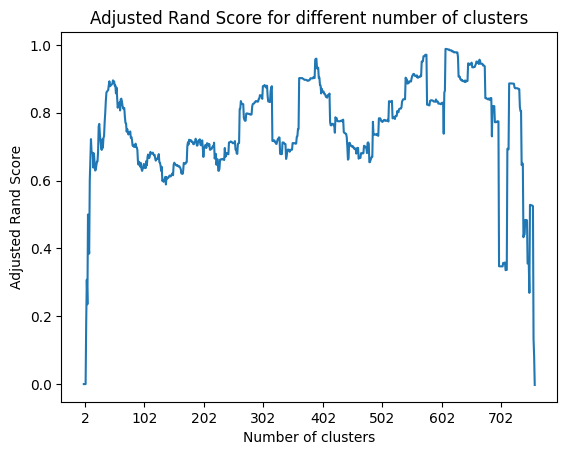

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# reverse the list, since the first element represent each point in its own cluster
best_lst = best_lst[::-1]

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")
plt.xticks(range(2, len(best_lst)+2, 100))

print(len(best_lst))
plt.plot(best_lst)
plt.savefig("results.eps")


In [3]:
print(np.median(best_lst))
print(np.mean(best_lst))

0.7698683149306852
0.7554499502248004
